## All you need is love… And a pet!

<img src="img/dataset-cover.jpg" width="920">

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from itertools import combinations 
import ast
from sklearn.linear_model import LogisticRegression
import seaborn as sn
%matplotlib inline

data_folder = './data/'

### A) Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). 
- Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. 
- Standardize the values of each feature in the data to have mean 0 and variance 1.

The use of external libraries is not permitted in part A, except for numpy and pandas. 
You can drop entries with missing values.

In [21]:
columns = ['animal_type', 'intake_year', 'intake_condition', 'intake_number', 'intake_type', 'sex_upon_intake', \
          'age_upon_intake_(years)', 'time_in_shelter_days', 'sex_upon_outcome', 'age_upon_outcome_(years)', \
          'outcome_type']
original_data = pd.read_csv(data_folder+'aac_intakes_outcomes.csv', usecols=columns)
original_data

,outcome_type,sex_upon_outcome,age_upon_outcome_(years),animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days
0,Return to Owner,Neutered Male,10.000000,Dog,Normal,Stray,Neutered Male,10.000000,2017,1.0,0.588194
1,Return to Owner,Neutered Male,7.000000,Dog,Normal,Public Assist,Neutered Male,7.000000,2014,2.0,1.259722
2,Return to Owner,Neutered Male,6.000000,Dog,Normal,Public Assist,Neutered Male,6.000000,2014,3.0,1.113889
3,Transfer,Neutered Male,10.000000,Dog,Normal,Owner Surrender,Neutered Male,10.000000,2014,1.0,4.970139
4,Return to Owner,Neutered Male,16.000000,Dog,Injured,Public Assist,Neutered Male,16.000000,2013,1.0,0.119444
...,...,...,...,...,...,...,...,...,...,...,...
79667,Transfer,Unknown,0.038356,Cat,Normal,Stray,Unknown,0.038356,2018,1.0,0.077083
79668,Euthanasia,Unknown,2.000000,Other,Normal,Wildlife,Unknown,2.000000,2018,1.0,0.053472
79669,Euthanasia,Unknown,1.000000,Other,Normal,Wildlife,Unknown,1.000000,2018,1.0,0.047917
79670,Return to Owner,Intact Male,0.821918,Dog,Normal,Stray,Intact Male,0.410959,2018,1.0,1.762500


In [22]:
original_data.outcome_type.unique()

array(['Return to Owner', 'Transfer', 'Adoption', 'Euthanasia', 'Died',
       'Rto-Adopt', 'Missing', 'Disposal', nan, 'Relocate'], dtype=object)

In [24]:
df = original_data.copy()

categorical_columns = ['sex_upon_outcome', 'animal_type', 'intake_condition',
                       'intake_type', 'sex_upon_intake']
df = pd.get_dummies(original_data, columns=categorical_columns)
df

,outcome_type,age_upon_outcome_(years),age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,...,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_type_Wildlife,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown
0,Return to Owner,10.000000,10.000000,2017,1.0,0.588194,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,Return to Owner,7.000000,7.000000,2014,2.0,1.259722,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,Return to Owner,6.000000,6.000000,2014,3.0,1.113889,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,Transfer,10.000000,10.000000,2014,1.0,4.970139,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,Return to Owner,16.000000,16.000000,2013,1.0,0.119444,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79667,Transfer,0.038356,0.038356,2018,1.0,0.077083,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
79668,Euthanasia,2.000000,2.000000,2018,1.0,0.053472,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
79669,Euthanasia,1.000000,1.000000,2018,1.0,0.047917,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
79670,Return to Owner,0.821918,0.410959,2018,1.0,1.762500,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [25]:
def Lable(s):
    if s == 'Adoption':
        s = 1
    else: s = 0
    return s

df.outcome_type = df.outcome_type.apply(Lable) 
df.outcome_type.sum()

33594

In [26]:
len(original_data[original_data.outcome_type == 'Adoption'])

33594

In [30]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, train_size=0.8, random_state=42)

len(df_train)/(len(df_train) + len(df_test))

0.7999924691234059

In [40]:
# If external libraries are not allowed:
idx = df.sample(round(0.8*df.shape[0])).index
df_train = df.loc[idx]
idx_not = [i for i in df.index if i not in idx]
df_test = df.loc[idx_not]
df_test

,outcome_type,age_upon_outcome_(years),age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,...,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_type_Wildlife,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown
4,0,16.000000,16.000000,2013,1.0,0.119444,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
10,0,16.000000,16.000000,2015,1.0,3.897222,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
15,0,13.000000,13.000000,2013,1.0,10.886111,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
16,0,19.000000,19.000000,2013,1.0,0.067361,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
25,0,13.000000,13.000000,2014,1.0,0.177083,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79650,0,1.000000,1.000000,2018,1.0,3.047917,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
79653,1,0.164384,0.164384,2018,1.0,3.941667,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
79657,0,0.739726,0.657534,2018,1.0,5.106944,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
79667,0,0.038356,0.038356,2018,1.0,0.077083,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [31]:
train_label = df_train.outcome_type
train_features = df_train.drop('outcome_type', axis=1)


test_label = df_test.outcome_type
test_features = df_test.drop(columns=['outcome_type'])

means = train_features.mean()
stddevs = train_features.std()

train_features_standardized = pd.DataFrame()

for c in train_features.columns:
    train_features_standardized[c] = (train_features[c]-means[c])/stddevs[c]

# Use the mean and stddev of the training set
test_features_standardized = pd.DataFrame()

for c in test_features.columns:
    test_features_standardized[c] = (test_features[c]-means[c])/stddevs[c]

train_features_standardized.head()

,age_upon_outcome_(years),age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown,...,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_type_Wildlife,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown
1791,0.643163,0.656784,0.432477,-0.278614,-0.308633,-0.362977,-0.372899,-0.742622,1.454518,-0.30492,...,-0.057905,-0.481748,-0.260383,0.653057,-0.213955,-0.651249,-0.683126,-0.43539,2.483020,-0.30492
20091,-0.682056,-0.701914,-1.100007,-0.278614,0.713385,-0.362977,-0.372899,1.346559,-0.687502,-0.30492,...,-0.057905,-0.481748,-0.260383,0.653057,-0.213955,-0.651249,1.463836,-0.43539,-0.402729,-0.30492
19501,0.643163,0.656784,-1.100007,-0.278614,7.748221,-0.362977,-0.372899,-0.742622,1.454518,-0.30492,...,-0.057905,-0.481748,-0.260383,0.653057,-0.213955,1.535488,-0.683126,-0.43539,-0.402729,-0.30492
11393,-0.454875,-0.472301,-1.100007,-0.278614,-0.300837,-0.362977,-0.372899,-0.742622,1.454518,-0.30492,...,-0.057905,-0.481748,-0.260383,0.653057,-0.213955,1.535488,-0.683126,-0.43539,-0.402729,-0.30492
8639,-0.540068,-0.529230,-1.100007,-0.278614,-0.282795,-0.362977,-0.372899,-0.742622,1.454518,-0.30492,...,-0.057905,-0.481748,-0.260383,0.653057,-0.213955,1.535488,-0.683126,-0.43539,-0.402729,-0.30492


### B) Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. 
- For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. 

In [61]:
logistic = LogisticRegression(solver='lbfgs', max_iter=10000)
logistic.fit(train_features_standardized, train_label)

prediction_proba = logistic.predict_proba(test_features_standardized)

prediction_proba[0]

array([0.50388489, 0.49611511])

In [62]:
logistic.classes_
# So we have that the prob of the first element to be 0 is 0.68, and the prob of it being 1 is 0.32.

array([0, 1])

In [63]:
threshold = 0.5
def PredictResult(probas, threshold):
    ans = []
    for i in probas:
        if i[1] > threshold:
            ans.append(1)
        else:
            ans.append(0)
    return ans

prediction = PredictResult(prediction_proba, threshold = 0.5)
prediction[0]

0

In [68]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_label, prediction)

array([[7680, 1617],
       [1212, 5426]])

In [69]:
# In the binary case, we can extract true positives, etc as follows:

tn, fp, fn, tp = confusion_matrix(test_label, prediction).ravel()
(tn, fp, fn, tp)

(7680, 1617, 1212, 5426)

In [73]:
accuracy =  (tp+tn)/(tn + fp + fn + tp)
accuracy

0.8224662692187009

In [77]:
precision_positive = tp/(tp+fp) if (tp+fp) !=0 else np.nan
precision_negative = tn/(tn+fn) if (tn+fn) !=0 else np.nan

precision_positive

0.7704103365043306

In [78]:
precision_negative

0.863697705802969

In [79]:
recall_positive = tp/(tp+fn) if (tp+fn) !=0 else np.nan
recall_negative = tn/(tn+fp) if (tn+fp) !=0 else np.nan

recall_positive

0.8174148840012052

In [80]:
recall_negative

0.8260729267505647

In [82]:
F1_score_positive = 2 *(precision_positive*recall_positive)/(precision_positive+recall_positive) if (precision_positive+recall_positive) !=0 else np.nan
F1_score_negative = 2 *(precision_negative*recall_negative)/(precision_negative+recall_negative) if (precision_negative+recall_negative) !=0 else np.nan

In [83]:
F1_score_positive

0.7932168701118341

In [84]:
F1_score_negative

0.8444664357578756

In [85]:
print("The accuracy of this model is {0:1.3f}".format(accuracy))
print("For the positive case, the precision is {0:1.3f}, the recall is {1:1.3f} and the F1 score is {2:1.3f}"\
      .format(precision_positive, recall_positive, F1_score_positive))
print("For the negative case, the precision is {0:1.3f}, the recall is {1:1.3f} and the F1 score is {2:1.3f}"\
      .format(precision_negative, recall_negative, F1_score_negative))

The accuracy of this model is 0.822
For the positive case, the precision is 0.770, the recall is 0.817 and the F1 score is 0.793
For the negative case, the precision is 0.864, the recall is 0.826 and the F1 score is 0.844


### C) Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold.

In [93]:
ans = []


for i in range(10):
    ans.append(i*2)
ans

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

Text(0, 0.5, 'accuracy')

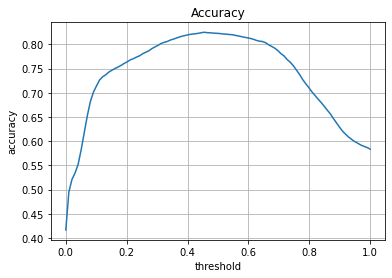

In [116]:
threshold = np.linspace(0, 1, 100)

accuracy_list = []
precision_positive_list = []
precision_negative_list = []
recall_positive_list = []
recall_negative_list = []
F1_score_positive_list = []
F1_score_negative_list = []

for t in threshold:
    prediction = PredictResult(prediction_proba, t)
    tn, fp, fn, tp = confusion_matrix(test_label, prediction).ravel()
    accuracy =  (tp+tn)/(tn + fp + fn + tp)
    precision_positive = tp/(tp+fp) if (tp+fp) !=0 else np.nan
    precision_negative = tn/(tn+fn) if (tn+fn) !=0 else np.nan
    recall_positive = tp/(tp+fn) if (tp+fn) !=0 else np.nan
    recall_negative = tn/(tn+fp) if (tn+fp) !=0 else np.nan
    F1_score_positive = 2 *(precision_positive*recall_positive)/(precision_positive+recall_positive) if (precision_positive+recall_positive) !=0 else np.nan
    F1_score_negative = 2 *(precision_negative*recall_negative)/(precision_negative+recall_negative) if (precision_negative+recall_negative) !=0 else np.nan

    accuracy_list.append(accuracy)
    precision_positive_list.append(precision_positive)
    precision_negative_list.append(precision_negative)
    recall_positive_list.append(recall_positive)
    recall_negative_list.append(recall_negative)
    F1_score_positive_list.append(F1_score_positive)
    F1_score_negative_list.append(F1_score_negative)
    
plt.plot(threshold, accuracy_list)
plt.grid()
plt.title('Accuracy')
plt.xlabel('threshold')
plt.ylabel('accuracy')

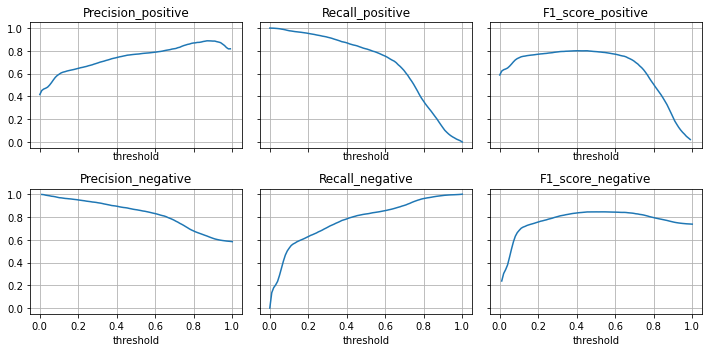

In [125]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(10,5))

axs[0, 0].plot(threshold, precision_positive_list)
axs[0, 0].set_title('Precision_positive')

axs[0, 1].plot(threshold, recall_positive_list)
axs[0, 1].set_title('Recall_positive')

axs[0, 2].plot(threshold, F1_score_positive_list)
axs[0, 2].set_title('F1_score_positive')

axs[1, 0].plot(threshold, precision_negative_list)
axs[1, 0].set_title('Precision_negative')

axs[1, 1].plot(threshold, recall_negative_list)
axs[1, 1].set_title('Recall_negative')

axs[1, 2].plot(threshold, F1_score_negative_list)
axs[1, 2].set_title('F1_score_negative')

for ax in axs.flat:
    ax.set(xlabel='threshold')
    ax.grid()
    
plt.tight_layout()

### D) Plot in a bar chart the coefficients of the logistic regression sorted by their contribution to the prediction.

In [132]:
logistic = LogisticRegression(solver='lbfgs', max_iter=10000)
logistic.fit(train_features_std, train_label)

tmp = []
for name, value in zip(train_features_std.columns, logistic.coef_[0]):
    tmp.append({"name": name, "value": value})
    
features_coef = pd.DataFrame(tmp).sort_values("value")
features_coef

,name,value
1,age_upon_intake_(years),-0.236806
26,intake_type_Wildlife,-0.019576
3,intake_number,-0.012441
12,animal_type_Dog,-0.009789
16,intake_condition_Injured,-0.006400
4,time_in_shelter_days,-0.006327
14,intake_condition_Aged,-0.006087
10,animal_type_Bird,-0.004677
17,intake_condition_Normal,-0.004291
11,animal_type_Cat,-0.003960


<BarContainer object of 32 artists>

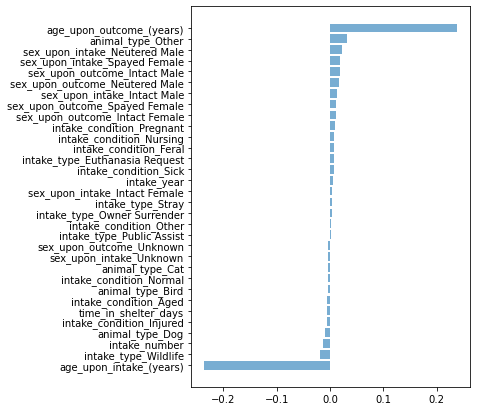

In [131]:
plt.subplots(figsize=(5,7))
plt.barh(features_coef.name, features_coef.value, alpha=0.6)


## Question 1: Which of the following metrics is most suitable when you are dealing with unbalanced classes?

- a) F1 Score
- b) Recall
- c) Precision
- d) Accuracy

## Question 2: You are working on a binary classification problem. You trained a model on a training dataset and got the following confusion matrix on the test dataset. What is true about the evaluation metrics (rounded to the second decimal point):

|            | Pred = NO|Pred=YES|
|------------|----------|--------|
| Actual NO  |    50    |   10   |
| Actual YES |    5     |   100  |

- a) Accuracy is 0.95
- b) Accuracy is 0.85
- c) False positive rate is 0.95
- d) True positive rate is 0.95